
<h1 align="center">Laboratorio de Estadística Computacional <br>con Python</h1>
<img src="https://activewizards.com/assets/components/phpthumbof/cache/main-image-python-site1422.5f5b0ce8fcd426270dff2a32a4bf5946.png" width="60%"></img>
<h2 align="center">Tema 1: Análisis Exploratorio </h2>
<center>
    <i> Notebook creado por Sebastián Bórquez G. - <a href="mailto://sebastian.borquez.g@gmail.com">sebastian.borquez.g@gmail.com</a> - DI UTFSM - Marzo 2019.</i>
</center>

## Tabla de Contenido

* [Análisis Exploratorio de Datos](#1)
    * [¿Por qué es importante?](#1.1)
    * [Caso de estudio: Migraciones en Chile](#1.2)
* [Manipulación de datos con Pandas ](#2)
    * [Carga de Datos](#2.1)
    * [Conociendo el Dataframe](#2.2)
    * [Realizar Consultas](#2.3)
    * [Operaciones sobre el DataFrame](#2.4)
    * [Agrupar datos](#2.5)
* [Visualizaciones](#3)
    * [Plots básicos con Matplotlib](#3.1)
    * [Seaborn, plots estádisticos](#3.2)

<div id="1"></div>

## Análisis Exploratorio de Datos

<img src="https://www.aiche.org/sites/default/files/images/webinar/shutterstock357106388.jpg" width="40%"></img>


<div id="1.1"></div>

### ¿Por qué es importante?

**Análisis exploratorio y visualizacion** de datos son dos pilares fundamentales del toobox de un **data scientist**.

A través de la exploraración de los datos y su visualización podemos descubrir siertos patrones, comportamientos o anomalías en nuestros datos. De esta forma podemos llegar **formular mejores hipotesis**.

Un análisis exploratiorio queremos **descubir que historia nos quieren contar los datos**.

<div id="1.2"></div>

### Caso de estudio: Migraciones en Chile

<img src="https://www.extranjeria.gob.cl/media/2016/03/logo-migraciones-sin-fondo-1.png" width=40% height=35%>


El caso de estudio que abarca esta sesión consiste en la exploración de datos de **inmigración en Chile** durante el año **2018**. El dataset se encuentra disponible en la página de __[Departamento de Extranjería y Migración](https://www.extranjeria.gob.cl/estadisticas-migratorias/)__ del Ministerio del Interior y Seguridad Pública.

__Descarga el datasets desde este [link](https://github.com/sborquez/Python-LEC/blob/master/data/Formato-WEB-PDs-2005-2016.xlsx?raw=true).__

In [0]:
dataset_path = "https://labcomp.cl/~sborquez/datasets/chile/Formato-WEB-PDs-2005-2016.xlsx"

<div id="2"></div>

## Manipulación de datos con Pandas

[Pandas](http://pandas.pydata.org/) (panel data) es un módulo de Python que nos provee de estructuras de datos, alto desempeño y herramientas para el análisis de datos.

Por lo general, como data scientist trabajaremos con datos en forma de tablas, estos por lo general se encuentran almacenados en formatos csv, xlsx, tsv, entre otros. Pandas nos ofrece una manera conveniente para cargar, procesar, analizar y guardar dichas tablas.

Cada vez que te inicias en una nueva herramienta recomiendo el uso de **cheat sheets** para ir aprendiendo sus comandos:

* [Pandas Official Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* [Pandas DataCamp 1](https://datacamp-community-prod.s3.amazonaws.com/fbc502d0-46b2-4e1b-b6b0-5402ff273251)
* [Pandas DataCamp 2](https://datacamp-community-prod.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8)


In [2]:
import pandas as pd
pd.__version__

'0.24.2'

#### Antes de comenzar

Para tener un primer acercamiento a la **sintaxis** usada en **Pandas** y sus objetos **DataFrame** y **Series** recomiendo enormemente inicar con:

<br>
<center>
    <a href=""><h1>10 Minutes to Panda</h1></a>
</center>

<div id="2.1"></div>

### Carga de Datos

In [0]:
pd.read_excel?

**`pd.read_excel()`** nos entrega un **DataFrame**, el cual es la representación que utiliza pandas para una tabla, esta posee tanto los nombres de las columnas, indices y los valores de los datos contenidos en la tabla.

In [4]:
visas = pd.read_excel(dataset_path)

print(type(visas))

<class 'pandas.core.frame.DataFrame'>


<div id="2.2"></div>

### Conociendo el DataFrame

In [6]:
print(visas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324932 entries, 0 to 324931
Data columns (total 12 columns):
SEXO          324932 non-null object
NACIMIENTO    324931 non-null datetime64[ns]
ACTIVIDAD     324932 non-null object
PROFESION     324932 non-null object
PAIS          324932 non-null object
ESTUDIOS      324932 non-null object
COMUNA        324932 non-null object
PROVINCIA     324932 non-null object
REGION        324932 non-null object
TIT_DEP       323623 non-null object
AÑO           324932 non-null int64
BENEFICIO     324932 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 29.7+ MB
None


In [7]:
print(f"Cantidad de filas: {len(visas)}")
print(f"Dimensiones: {visas.shape}")
print(f"Cantidad de valores: {visas.size}")
print("Columnas: ", *visas.columns)

Cantidad de filas: 324932
Dimensiones: (324932, 12)
Cantidad de valores: 3899184
Columnas:  SEXO NACIMIENTO ACTIVIDAD PROFESION PAIS ESTUDIOS COMUNA PROVINCIA REGION TIT_DEP AÑO BENEFICIO


Podemos hacernos una idea del contenido del Dataframe utilizando los métodos **`head(n)`** y **`tail(n)`**. Tal como sus nombres lo indican, muestran los **`n`** primeros o **`n`** últimas filas del Dataframe respectivamente.

In [8]:
visas.head(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,Femenino,1974-10-05,EMPLEADO,MATRONA,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA
1,Masculino,1949-09-13,EMPLEADO,INGENIERO,ECUADOR,no indica,PROVIDENCIA,SANTIAGO,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA
2,Femenino,1949-12-07,EMPLEADO,ASESORA DEL HOGAR,BOLIVIA,BASICO,ARICA,ARICA,ARICA Y PARINACOTA,T,2007,PERMANENCIA DEFINITIVA
3,Femenino,1966-09-20,DUEÑA DE CASA,DUEÑA DE CASA,BOLIVIA,MEDIO,ARICA,ARICA,ARICA Y PARINACOTA,T,2006,PERMANENCIA DEFINITIVA
4,Masculino,1981-08-15,EMPRESARIO O PATRON,COMERCIANTE,BRASIL,no indica,LAS CONDES,SANTIAGO,METROPOLITANA,T,2008,PERMANENCIA DEFINITIVA


In [9]:
visas.tail(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
324927,Masculino,1986-03-18,INACTIVO,EMPLEADO,ESPAÑA,NO INFORMA,LAS CONDES,SANTIAGO,METROPOLITANA,T,2016,PERMANENCIA DEFINITIVA
324928,Masculino,1977-06-27,NO INFORMA,NO INFORMA,MEXICO,NO INFORMA,LAS CONDES,SANTIAGO,METROPOLITANA,T,2016,PERMANENCIA DEFINITIVA
324929,Masculino,1954-04-07,NO INFORMA,NO INFORMA,CHINA REPUBLICA POPULAR,NO INFORMA,LAMPA,CHACABUCO,METROPOLITANA,T,2016,PERMANENCIA DEFINITIVA
324930,Femenino,1989-05-03,EMPLEADO,ADMINISTRADOR,CHINA REPUBLICA POPULAR,NO INFORMA,TALCA,TALCA,MAULE,T,2016,PERMANENCIA DEFINITIVA
324931,Femenino,1965-03-26,RELIGIOSO,RELIGIOSO,ESPAÑA,TECNICO,QUINTA NORMAL,SANTIAGO,METROPOLITANA,T,2016,PERMANENCIA DEFINITIVA


#### Valores por columna

In [10]:
for column in visas:
    print(f"{column} tiene {visas[column].nunique()} valores diferentes")

SEXO tiene 2 valores diferentes
NACIMIENTO tiene 27688 valores diferentes
ACTIVIDAD tiene 15 valores diferentes
PROFESION tiene 599 valores diferentes
PAIS tiene 164 valores diferentes
ESTUDIOS tiene 8 valores diferentes
COMUNA tiene 351 valores diferentes
PROVINCIA tiene 55 valores diferentes
REGION tiene 15 valores diferentes
TIT_DEP tiene 2 valores diferentes
AÑO tiene 12 valores diferentes
BENEFICIO tiene 2 valores diferentes


#### Valores de ESTUDIOS: 

In [0]:
print(visas["ESTUDIOS"].unique())

['no indica' 'BASICO' 'MEDIO' 'TECNICO' 'UNIVERSITARIO' 'NO INFORMA'
 'NINGUNO' 'PREBASICO']


#### Cantidad de individuos por cada valor de ESTUDIOS:

In [0]:
visas.ESTUDIOS.value_counts()

no indica        105585
MEDIO             76010
NO INFORMA        46544
UNIVERSITARIO     35108
BASICO            32790
TECNICO           18482
NINGUNO            7019
PREBASICO          3394
Name: ESTUDIOS, dtype: int64

#### Comparar dos variables

Quizás lo que nos interesa es saber como se distribuyen nuestros individuos pero en **dos variables**. Para esto existen las tablas de contigencia disponibles con el comando **`crosstab`**

In [0]:
pd.crosstab(visas["ACTIVIDAD"], visas["SEXO"])

SEXO,Femenino,Masculino
ACTIVIDAD,,
DUEÑA DE CASA,31657,139
EMPLEADO,54669,89435
EMPLEADO DOMESTICO,37055,518
EMPRESARIO O PATRON,1714,4259
ESTUDIANTE,24029,24169
INACTIVO,10043,7712
JUBILADO O PENSIONADO,901,1680
NO INFORMA,1707,1570
OBRERO O JORNALERO,875,10808


<div id="2.3"></div>

### Realizar Consultas

Pandas nos ofrece una interface sencilla al momento de realizar consultas al conjunto de datos.

Si queremos solo las filas que cumplen una condición usamos la siguiente sintaxis:

```python
dataframe[<condiciones>]
```

Por ejemplo, las personas que provienen de _Perú_.

In [0]:
(visas["PAIS"] == "PERÚ").head(5)

0     True
1    False
2    False
3    False
4    False
Name: PAIS, dtype: bool

In [0]:
visas[visas["PAIS"] == "PERÚ"].head(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,Femenino,1974-10-05,EMPLEADO,MATRONA,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA
8,Masculino,1990-08-17,ESTUDIANTE,ESTUDIANTE,PERÚ,no indica,PEÑAFLOR,TALAGANTE,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA
9,Femenino,1964-04-08,EMPLEADO,CHEF,PERÚ,no indica,OSORNO,OSORNO,LOS LAGOS,T,2007,PERMANENCIA DEFINITIVA
11,Masculino,1961-08-31,EMPLEADO,JARDINERO,PERÚ,no indica,CONCHALI,SANTIAGO,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA
14,Masculino,1952-01-17,EMPLEADO,MECANICO,PERÚ,MEDIO,POZO ALMONTE,TAMARUGAL,TARAPACA,T,2007,PERMANENCIA DEFINITIVA


O pueden incluir las operaciones lógicas **`AND (&)`**,**`OR (|)`** y **`NOT (~)`** usando varias condiciones como:

In [0]:
visas[(visas["PAIS"] == "PERÚ") & ((visas["COMUNA"] == "VIÑA DEL MAR") | (visas["COMUNA"] == "VALPARAISO"))]

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
226,Masculino,1985-03-07,EMPLEADO,ARTESANO,PERÚ,no indica,VIÑA DEL MAR,VALPARAISO,VALPARAISO,T,2006,PERMANENCIA DEFINITIVA
1116,Femenino,1940-05-27,JUBILADO O PENSIONADO,EDUCADOR,PERÚ,NO INFORMA,VIÑA DEL MAR,VALPARAISO,VALPARAISO,T,2009,PERMANENCIA DEFINITIVA
2296,Masculino,1965-04-08,EMPLEADO,PUBLICISTA,PERÚ,TECNICO,VALPARAISO,VALPARAISO,VALPARAISO,T,2015,PERMANENCIA DEFINITIVA
2782,Femenino,1974-08-15,EMPLEADO DOMESTICO,ASESORA DEL HOGAR,PERÚ,MEDIO,VIÑA DEL MAR,VALPARAISO,VALPARAISO,T,2016,PERMANENCIA DEFINITIVA
2860,Masculino,1953-09-05,EMPRESARIO O PATRON,EMPRESARIO O PATRON,PERÚ,UNIVERSITARIO,VIÑA DEL MAR,VALPARAISO,VALPARAISO,T,2009,PERMANENCIA DEFINITIVA
2861,Femenino,1961-04-09,TRABAJADOR POR CUENTA PROPIA,COMERCIANTE,PERÚ,NO INFORMA,VIÑA DEL MAR,VALPARAISO,VALPARAISO,T,2011,PERMANENCIA DEFINITIVA
3238,Masculino,1949-06-02,OTRAS ACTIVIDADES,ARTISTA,PERÚ,MEDIO,VALPARAISO,VALPARAISO,VALPARAISO,T,2009,PERMANENCIA DEFINITIVA
3307,Femenino,1986-09-28,EMPLEADO,EMPLEADO,PERÚ,MEDIO,VIÑA DEL MAR,VALPARAISO,VALPARAISO,T,2016,PERMANENCIA DEFINITIVA
3406,Masculino,1970-10-21,EMPLEADO,PODOLOGO,PERÚ,TECNICO,VIÑA DEL MAR,VALPARAISO,VALPARAISO,T,2009,PERMANENCIA DEFINITIVA
3534,Masculino,1989-05-20,ESTUDIANTE,ESTUDIANTE,PERÚ,MEDIO,VIÑA DEL MAR,VALPARAISO,VALPARAISO,T,2016,PERMANENCIA DEFINITIVA


Tambien podemos utilizar el método **`isin`** para corroborar con una lista de valores.

In [0]:
visas[(visas["ACTIVIDAD"].isin(['ESTUDIANTE'])) & ~(visas["ESTUDIOS"].isin(['PREBASICO','BASICO', 'MEDIO', 'NO INFORMA', 'NINGUNO']))].head(10)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
8,Masculino,1990-08-17,ESTUDIANTE,ESTUDIANTE,PERÚ,no indica,PEÑAFLOR,TALAGANTE,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA
12,Masculino,1992-07-13,ESTUDIANTE,ESTUDIANTE,COLOMBIA,no indica,QUINTA NORMAL,SANTIAGO,METROPOLITANA,D,2006,PERMANENCIA DEFINITIVA
28,Masculino,1987-08-19,ESTUDIANTE,ESTUDIANTE,PERÚ,UNIVERSITARIO,PUDAHUEL,SANTIAGO,METROPOLITANA,D,2008,PERMANENCIA DEFINITIVA
38,Femenino,1985-10-03,ESTUDIANTE,ESTUDIANTE,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA
39,Masculino,1988-02-20,ESTUDIANTE,ESTUDIANTE,PERÚ,no indica,SAN MIGUEL,SANTIAGO,METROPOLITANA,T,2008,PERMANENCIA DEFINITIVA
40,Masculino,1990-01-04,ESTUDIANTE,ESTUDIANTE,PERÚ,UNIVERSITARIO,SAN MIGUEL,SANTIAGO,METROPOLITANA,T,2008,PERMANENCIA DEFINITIVA
43,Femenino,1980-04-10,ESTUDIANTE,ESTUDIANTE,COLOMBIA,no indica,LAS CONDES,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA
63,Masculino,1987-04-18,ESTUDIANTE,ESTUDIANTE,IRAN,no indica,LA FLORIDA,SANTIAGO,METROPOLITANA,D,2007,PERMANENCIA DEFINITIVA
88,Masculino,1988-10-31,ESTUDIANTE,ESTUDIANTE,PERÚ,no indica,PUENTE ALTO,CORDILLERA,METROPOLITANA,D,2006,PERMANENCIA DEFINITIVA
107,Femenino,1988-08-05,ESTUDIANTE,ESTUDIANTE,PERÚ,no indica,CONCHALI,SANTIAGO,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA


<div id="2.4"></div>

### Operaciones sobre DataFrames

No tan solo podemos **acceder** a los valores, podemos **crear** nuevas columnas a partir de las actuales, **modificar** columnas o incluso **eliminar** columnas que no necesitamos.

Por ejemplo, podemos crear una nueva columna que obtenga la _edad de las personas_.

In [0]:

def powe(x):
  return x**2

powe(2), (lambda x: x**2)(2)


(4, 4)

In [11]:
from datetime import datetime

visas["EDAD"] = (datetime.now() - visas["NACIMIENTO"]).transform(lambda x: x.days // 365)
visas.head(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO,EDAD
0,Femenino,1974-10-05,EMPLEADO,MATRONA,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA,45.0
1,Masculino,1949-09-13,EMPLEADO,INGENIERO,ECUADOR,no indica,PROVIDENCIA,SANTIAGO,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA,70.0
2,Femenino,1949-12-07,EMPLEADO,ASESORA DEL HOGAR,BOLIVIA,BASICO,ARICA,ARICA,ARICA Y PARINACOTA,T,2007,PERMANENCIA DEFINITIVA,69.0
3,Femenino,1966-09-20,DUEÑA DE CASA,DUEÑA DE CASA,BOLIVIA,MEDIO,ARICA,ARICA,ARICA Y PARINACOTA,T,2006,PERMANENCIA DEFINITIVA,53.0
4,Masculino,1981-08-15,EMPRESARIO O PATRON,COMERCIANTE,BRASIL,no indica,LAS CONDES,SANTIAGO,METROPOLITANA,T,2008,PERMANENCIA DEFINITIVA,38.0


Podemos modificar columnas, por ejemplo en la lista de **`ESTUDIOS`** tiene valores que son "repetidos" pero tienen diferente nombre. Me refiero a `'no indica'`, `'NO INFORMA'`. Queremos eliminar estos dos valores y dejar solo uno.

In [0]:
visas["ESTUDIOS"].replace("no indica", "NO INFORMA", inplace=True)
visas["ESTUDIOS"].value_counts()

NO INFORMA       152129
MEDIO             76010
UNIVERSITARIO     35108
BASICO            32790
TECNICO           18482
NINGUNO            7019
PREBASICO          3394
Name: ESTUDIOS, dtype: int64

También se puede dar el caso que algunas columnas sean innecesarias, por ejemplo el `BENEFICIO`, ya que en este caso siempre es 2018.

In [0]:
visas.drop?
#(columns=["TIT_DEP", "BENEFICIO"], inplace=True)
#visas.head(5)

<div id="2.5"></div>

### Agrupar Datos

A veces es necesario separar los datos por algún atributo, separaremos el dataset por *`país`*.

In [15]:
paises = visas.groupby("PAIS")
paises

In [16]:
from IPython.display import display, HTML

print("Paises:", len(paises))
i = 0
for pais, df in paises:
    display(HTML(f"<h3 align='center'>{pais.title()}</h3>"))
    display(df.head(3))
    i+=1
    if i==2: break

Paises: 164


,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,AÑO,EDAD
127,Masculino,1981-04-27,EMPRESARIO O PATRON,COMERCIANTE,AFGANISTAN,no indica,PUDAHUEL,SANTIAGO,METROPOLITANA,2006,38.0
246,Femenino,1983-07-27,EMPRESARIO O PATRON,EMPRESARIO O PATRON,AFGANISTAN,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,2007,36.0
354,Femenino,1965-07-12,TRABAJADOR POR CUENTA PROPIA,DUEÑA DE CASA,AFGANISTAN,no indica,MACUL,SANTIAGO,METROPOLITANA,2007,54.0


,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,AÑO,EDAD
12011,Masculino,1936-02-10,JUBILADO O PENSIONADO,ECONOMISTA,ALBANIA,no indica,ÑUÑOA,SANTIAGO,METROPOLITANA,2005,83.0
12012,Femenino,1947-02-28,JUBILADO O PENSIONADO,ECONOMISTA,ALBANIA,no indica,ÑUÑOA,SANTIAGO,METROPOLITANA,2005,72.0
86776,Femenino,1975-05-06,INACTIVO,DUEÑA DE CASA,ALBANIA,NO INFORMA,HUALPEN,CONCEPCIÓN,BIOBIO,2008,44.0


In [0]:
paises["EDAD"].mean(), paises["EDAD"].std()

(PAIS
 AFGANISTAN                    32.600000
 ALBANIA                       43.400000
 ALEMANIA                      46.709233
 ANDORRA                       45.666667
 ANGOLA                        41.000000
 ANTILLAS NEERLANDESAS         66.000000
 APATRIDA                      23.000000
 ARABIA SAUDITA                51.500000
 ARGELIA                       37.437500
 ARGENTINA                     40.496356
 ARMENIA                       38.714286
 AUSTRALIA                     44.829746
 AUSTRIA                       45.319767
 AZERBAIYAN                    33.500000
 BAHAMAS                       38.166667
 BANGLADESH                    44.777778
 BELGICA                       45.600000
 BELICE                        39.333333
 BENIN                         38.750000
 BOLIVIA                       34.119726
 BOSNIA Y HERZEGOVINA          37.187500
 BRASIL                        38.983742
 BULGARIA                      40.833333
 BURKINA FASO                  41.750000
 CAMBOYA  

<div id="3"></div>

## Visualizaciones

<img src="https://cdn-images-1.medium.com/max/1200/1*H5M0nBLll9E4rCsBOplKVQ.jpeg" width="60%"></img>

La **visualización de los datos** es de suma importancia, el emplear un modo visual que presente la información incluso cuando el volumen de datos es bastante considerable, permite contar la historia y llegar más fácil al público. Permitiendo una manera sencilla de **encontrar patrones** y **obtener información**.

<div id="3.1"></div>

### Plots Básicos con Matplotlib

Matplotlib es una herramienta sencilla y la base para contruir plots en Seaborn, por lo general utilizarás la siguiente estructura para crear tus plots.

In [17]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.__version__

'3.0.3'

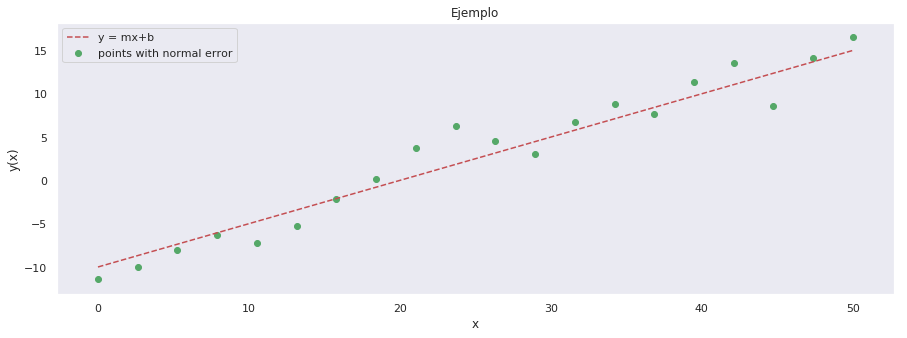

In [20]:
# Usamos numpy para generar valores
import numpy as np

# Ecuacion lineal
m = 0.5
b = -10

x = np.linspace(0, 50, 20)
y = m*x + b 

# Error: e ~ N(0, 2)
e = np.random.normal(0, 2, len(x))

# Tamaño de Plot
plt.figure(figsize=(15, 5))

# Plots
plt.plot(x, y, "r--", label="y = mx+b");
plt.scatter(x, y+e, c="g", label="points with normal error")

# Diseño
plt.legend()
plt.title("Ejemplo")
plt.ylabel("y(x)")
plt.xlabel("x")
plt.grid()

# Show
plt.show()

<div id="3.2"></div>

### Seaborn, plots estádisticos

Seaborn agrega más funcionalidades a matplotlib, fácilidades para crear **plots estadísticos** y **mejoras visuales**. Una buena forma de aprender a visualizar datos es a través de ejemplo.

In [0]:
import seaborn as sns
sns.set(style="darkgrid")

### Pandas Plot

Pandas también incluye su propia interface para plotear **`plot`** la cual nos facilita la tarea de elegir los ejes, su documentación oficial [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). 

 A continuación se mostrarán como crear diferentes tipos de plots utilizando Matplotlib, Seaborn y Pandas en conjunto. Para más ejemplos visita la [galería](https://seaborn.pydata.org/examples/index.html) de Seaborn.



#### Bar Plot

¿Cómo se distribuyen las personas según su país de origen en el año 2016? ¿De qué pais vienen más inmigrantes, y menos inmigrantes?

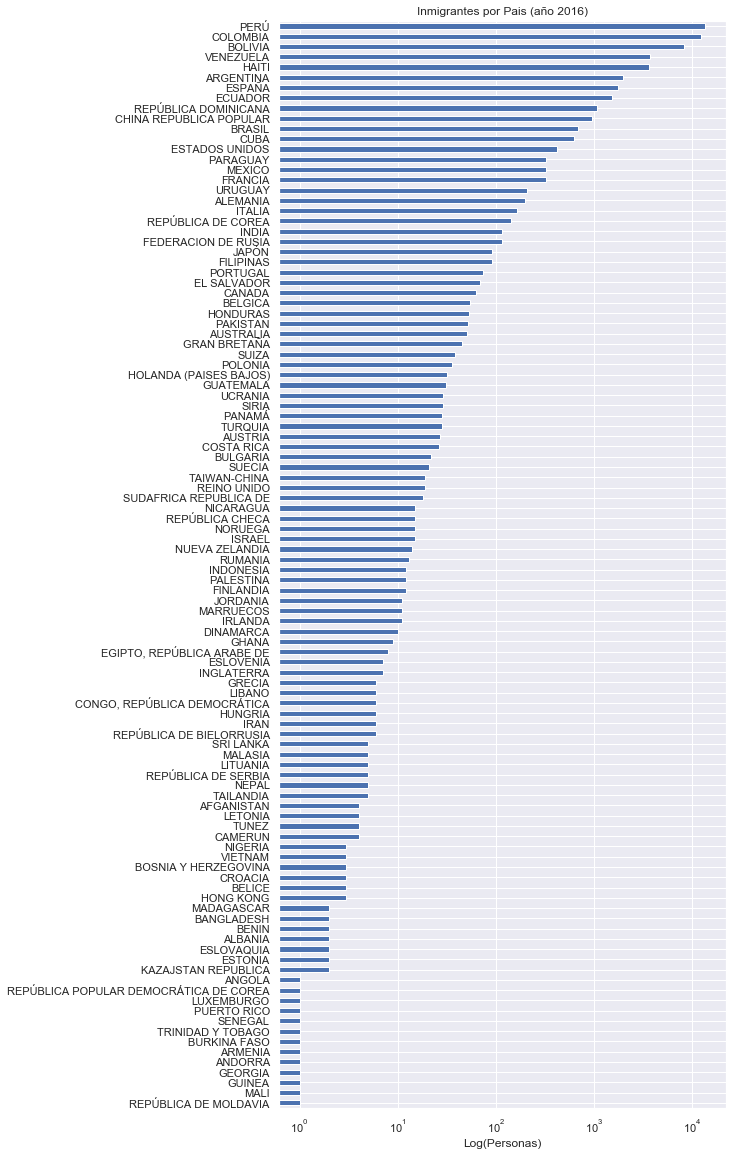

In [0]:
# Seleccion de datos
personas_por_pais = visas[visas["AÑO"] == 2016]["PAIS"].value_counts()

# Tamaño del plot
plt.figure(figsize=(8, 20))

# Bar plot horizontal en escala logaritmica
personas_por_pais.plot("barh", logx=True)

# Estilo
plt.title("Inmigrantes por Pais (año 2016)")
plt.xlabel("Log(Personas)")

# Invertir eje y (mostrar de mayor a menor)
plt.gca().invert_yaxis()

plt.show();

#### Pie Plot

¿Cuál género se manifiesta más?

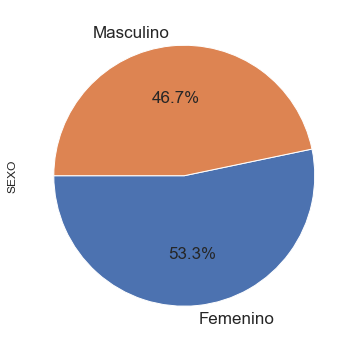

In [0]:
# Seleccion de datos
generos = visas["SEXO"].value_counts()

# Tamaño
plt.figure(figsize=(6,6))

# Pie Chart con porcentajes
generos.plot("pie", autopct='%1.1f%%', startangle=180, fontsize=17)

plt.show();

#### Scatter plot


¿Existe algún patrón, correlación entre las diferentes variables?

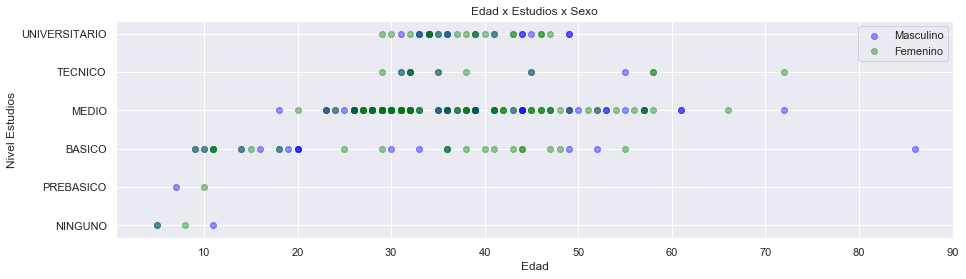

In [0]:
# Seleccionar datos
# Pasar de categoria a numero
from pandas.api.types import CategoricalDtype
estudios = CategoricalDtype(categories=["NINGUNO", "PREBASICO", "BASICO", "MEDIO", "TECNICO", "UNIVERSITARIO"], ordered=True)

df = visas[visas["COMUNA"] == "VALLENAR"][["EDAD", "SEXO", "ESTUDIOS"]]
df["ESTUDIOS"] = df["ESTUDIOS"].astype(estudios)
df.dropna(inplace=True)

m = df[df["SEXO"] == "Masculino"]
f = df[df["SEXO"] != "Masculino"]


# Tamaño
plt.figure(figsize=(15,4))

# Plots
plt.scatter(y=m["ESTUDIOS"].cat.codes, x=m["EDAD"], c="blue", label="Masculino", alpha=0.4);
plt.scatter(y=f["ESTUDIOS"].cat.codes, x=f["EDAD"], c="green", label="Femenino", alpha=0.4);

# Estilo
plt.title("Edad x Estudios x Sexo")
plt.xlabel("Edad")
plt.ylabel("Nivel Estudios")
plt.yticks(range(6), ["NINGUNO", "PREBASICO", "BASICO", "MEDIO", "TECNICO", "UNIVERSITARIO"])
plt.legend();

#### Box Plot

¿Cómo se distribuye la edad según cada región?

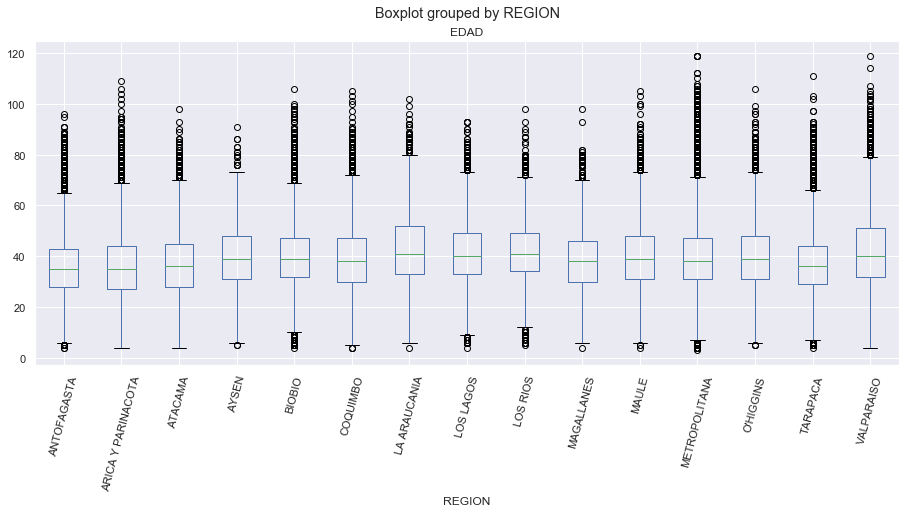

In [0]:
visas.boxplot(column=["EDAD"], by="REGION", figsize=(15,6), rot=75);

#### Lineal Plot

¿Qué tendencias siguen la llegada de inmigrante de un país?

In [0]:
paises = visas.groupby("PAIS")


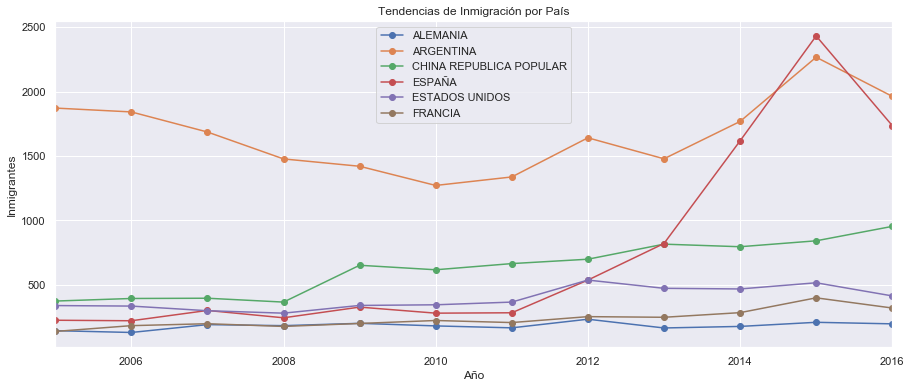

In [0]:
plt.figure(figsize=(15,6))

for pais, df in paises:
    if pais in ["ESTADOS UNIDOS", "FRANCIA", "ALEMANIA", "CHINA REPUBLICA POPULAR", "ARGENTINA", "ESPAÑA"]:
        anual = df["AÑO"].value_counts().sort_index()
        anual.plot.line(label=pais, style="o-")
        
plt.title("Tendencias de Inmigración por País")
plt.xlabel("Año")
plt.ylabel("Inmigrantes")
plt.legend();

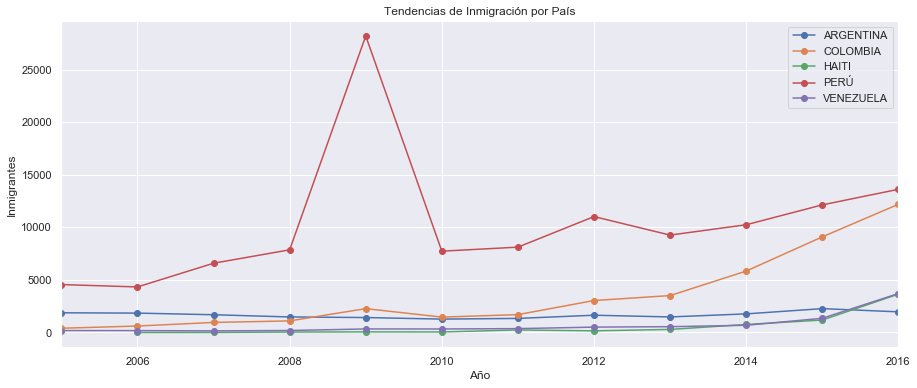

In [0]:
plt.figure(figsize=(15,6))

for pais, df in paises:
    if pais in ["VENEZUELA", "HAITI", "PERÚ", "COLOMBIA", "ARGENTINA"]:
        anual = df["AÑO"].value_counts().sort_index()
        anual.plot.line(label=pais, style="o-")
        
plt.title("Tendencias de Inmigración por País")
plt.xlabel("Año")
plt.ylabel("Inmigrantes")
plt.legend();